# Machine Learning Capstone Project
##### Manish Kumar, 15th October, 2019

### TMDB box-office prediction

## 1. Data Exploration

### 1.1 Importing Data

In [597]:
#import necessary libraries
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import sklearn
from sklearn.metrics import r2_score
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import SGDRegressor,LinearRegression,Lasso
from sklearn.preprocessing import StandardScaler
#Supress Deprecation warnings
import warnings
warnings.simplefilter("ignore")
#Fomatting floating point values
pd.set_option('display.float_format', lambda x: '%.3f' % x)
sb.set(style="darkgrid")
import calendar
from IPython.display import Markdown,display

In [598]:
# Print Versions of various Packages
print("Python version: {}".format(sys.version[:5]))
print("sklearn version: {}".format(sklearn.__version__))
print("Pandas version: {}".format(pd.__version__))
print("Numpy version: {}".format(np.__version__))
print("Seaborn version: {}".format(sb.__version__))

Python version: 2.7.1
sklearn version: 0.18.2
Pandas version: 0.20.3
Numpy version: 1.13.3
Seaborn version: 0.9.0


In [599]:
# Importing training and testing data
tmdb_train=pd.read_csv("train.csv")
tmdb_test=pd.read_csv("test.csv")

### 1.2 Some salient points about Datasets

In [600]:
# Inspecting training sample record
tmdb_train.head(1)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575,...,2/20/15,93.000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651


In [601]:
# Inspecting test sample record
tmdb_test.head(1)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.852,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.000,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."


In [602]:
# Checking size of the datasets
print("Training dataset has {} rows and {} columns.".format(*tmdb_train.shape))
print("Testing dataset has {} rows and {} columns.".format(*tmdb_test.shape))

Training dataset has 3000 rows and 23 columns.
Testing dataset has 4398 rows and 22 columns.


In [603]:
# Checking datatypes
tmdb_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

##### 1.2.1 Feature Characteristics:
>  
  * __budget__ : *Continuous Numerical data.*
  * __genres__ : *Categorical data (in form of dictionary).*
  * __imdb_id__ : *Continuous Numerical data.*
  * __original_language__ : *Categorical data ('en', 'hi', 'ko', 'sr', 'fr', 'it', 'nl', 'zh', 'es', 'cs', 'ta',
       'cn', 'ru', 'tr', 'ja', 'fa', 'sv', 'de', 'te', 'pt', 'mr', 'da','fi', 'el', 'ur', 'he', 'no', 'ar', 'nb', 
       'ro', 'vi', 'pl', 'hu','ml', 'bn', 'id').* 
  * __original_title__ : *Textual data.*
  * __popularity__ : *Continuous Numerical data.*
  * __production_companies__ : *Categorical data.*
  * __production_countries__ : *Categorical data.*
  * __release_date__: *Date type.*
  * __runtime__ : *Continuous Numerical data.*
  * __spoken_languages__: *Categorical data.*
  * __status__ : *Categorical data ('Released', 'Rumored').*
  * __title__ : *Textual data.*
  * __cast__ : *Textual data.*
  * __crew__ : *Textual data.*
  * __revenue__ : *Continuous Numerical data.*

### 1.3 Data types and Anomalies Detection: Missing values, Duplicates, Null values, Outliers etc.

In [604]:
# Checking basic statistics
tmdb_train.describe()

,id,budget,popularity,runtime,revenue
count,3000.000,3000.000,3000.000,2998.000,3000.000
mean,1500.500,22531334.110,8.463,107.857,66725851.889
std,866.170,37026086.412,12.104,22.086,137532326.336
min,1.000,0.000,0.000,0.000,1.000
25%,750.750,0.000,4.018,94.000,2379808.250
50%,1500.500,8000000.000,7.375,104.000,16807068.000
75%,2250.250,29000000.000,10.891,118.000,68919203.500
max,3000.000,380000000.000,294.337,338.000,1519557910.000


In [605]:
# Checking which column has missing values, if any
tmdb_train.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [606]:
# Number of records where runtime is zero
tmdb_train[tmdb_train.runtime==0].count()

id                       12
belongs_to_collection     2
budget                   12
genres                   12
homepage                  1
imdb_id                  12
original_language        12
original_title           12
overview                  6
popularity               12
poster_path              12
production_companies     10
production_countries     12
release_date             12
runtime                  12
spoken_languages         11
status                   12
tagline                   0
title                    12
Keywords                  5
cast                     12
crew                     12
revenue                  12
dtype: int64

In [607]:
# Number of records where budget is zero
tmdb_train[tmdb_train.budget==0].count()

id                       812
belongs_to_collection    106
budget                   812
genres                   810
homepage                 172
imdb_id                  812
original_language        812
original_title           812
overview                 810
popularity               812
poster_path              811
production_companies     730
production_countries     776
release_date             812
runtime                  811
spoken_languages         799
status                   812
tagline                  516
title                    812
Keywords                 675
cast                     811
crew                     809
revenue                  812
dtype: int64

In [608]:
# Number of records where budget is zero
tmdb_train[tmdb_train.popularity==0].count()

id                       0
belongs_to_collection    0
budget                   0
genres                   0
homepage                 0
imdb_id                  0
original_language        0
original_title           0
overview                 0
popularity               0
poster_path              0
production_companies     0
production_countries     0
release_date             0
runtime                  0
spoken_languages         0
status                   0
tagline                  0
title                    0
Keywords                 0
cast                     0
crew                     0
revenue                  0
dtype: int64

##### 1.3.1 Data Cleaning

In [609]:
tmdb_train.drop(tmdb_train[pd.isnull(tmdb_train['runtime'])==True].index,inplace=True)

In [610]:
tmdb_train.drop(tmdb_train[tmdb_train.budget==0].index,inplace=True)

In [611]:
# Convert columns into int type
tmdb_train['budget']=tmdb_train['budget'].astype(np.int64)
tmdb_train['popularity']=tmdb_train['popularity'].astype(np.int64)
tmdb_train['runtime']=tmdb_train['runtime'].astype(np.int64)
tmdb_train['revenue']=tmdb_train['revenue'].astype(np.int64)

##### 1.3.2 Feature Engineering

In [612]:
# Converting 'release_date' to datetime type
tmdb_train['release_date']=pd.to_datetime(tmdb_train['release_date'])

In [613]:
# Extracting month from 'release_date'
tmdb_train['release_month']=tmdb_train['release_date'].dt.month

In [614]:
# Extracting day of week from 'release_date'
tmdb_train['day_of_week']=tmdb_train['release_date'].dt.dayofweek

In [615]:
# Converting month into month_name
tmdb_train['release_month']=tmdb_train['release_month'].apply(lambda m:calendar.month_abbr[m])

In [616]:
# Converting day of week into weekday name
tmdb_train['day_of_week']=tmdb_train['day_of_week'].apply(lambda d:calendar.day_name[d])

### 1.4 Exploratory Data Analysis Using Data Visualization

##### 1.4.1 Univariate Analysis

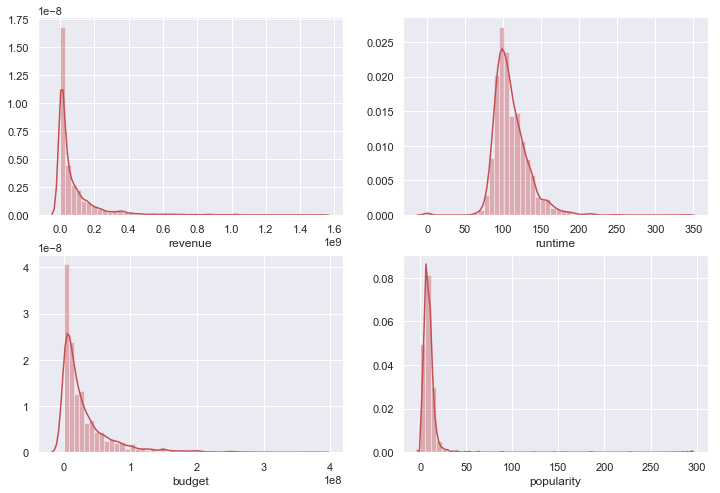

In [649]:
# Drawing histogram of 'revenue', 'runtime', 'budget' and 'popularity'
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sb.distplot(tmdb_train.revenue,color='r');
plt.subplot(2, 2, 2)
sb.distplot(tmdb_train.runtime,color='r');
plt.subplot(2, 2, 3)
sb.distplot(tmdb_train.budget,color='r');
plt.subplot(2, 2, 4)
sb.distplot(tmdb_train.popularity,color='r');

##### 1.4.2 Bivariate Analysis

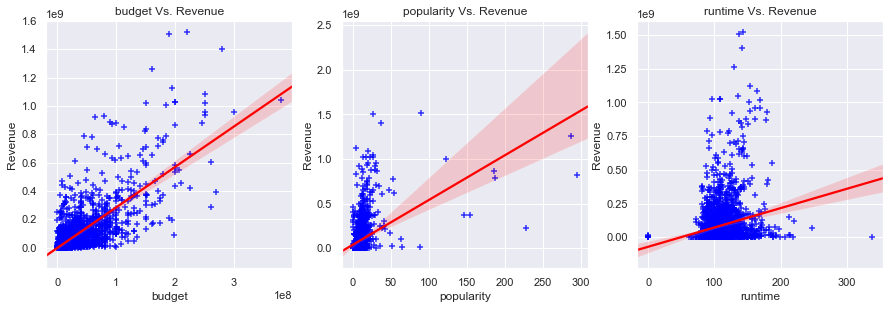

In [647]:
# Drawing scatterplots to see the correlation between the features and label variable
columns=['budget','popularity','runtime']
m=len(columns)
plt.figure(figsize=(15,10))
for i,col in enumerate(columns):
    plt.subplot((m//3)+1,3,i+1)
    sb.regplot(tmdb_train[col], tmdb_train.revenue, marker='+',scatter_kws={"color": "blue"}, line_kws={"color": "red"})
    plt.title('%s Vs. Revenue' % col)
    plt.xlabel(col)
    plt.ylabel('Revenue')      

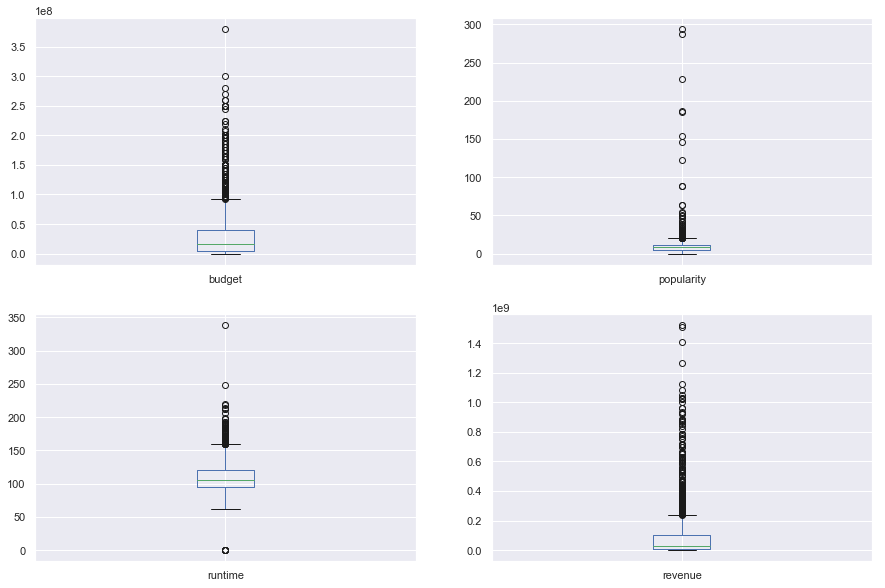

In [645]:
columns=['budget','popularity','runtime','revenue']
m=len(columns)
plt.figure(figsize=(15,10))
for i,col in enumerate(columns):
    plt.subplot((m//3)+1,2,i+1)
    tmdb_train[col].plot(kind='box')

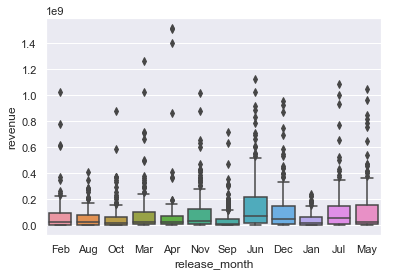

In [620]:
sb.boxplot(data=tmdb_train_df,y='revenue',x='release_month');

##### 1.4.2 Multivariate Analysis

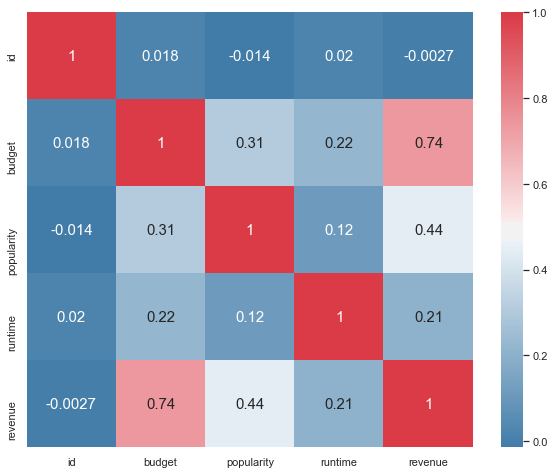

In [621]:
plt.figure(figsize=(10,8))
cmap = sb.diverging_palette(240, 10, as_cmap=True);
sb.heatmap(tmdb_train.corr(),annot=True,annot_kws={'size':15},cmap=cmap);

##### Remove Redundant Variables: 
>id, belongs_to_collection, homepage, imdb_id, original_language, original_title, overview, poster_path, production_companies, production_countries, 

### Features:

> popularity, runtime, budget, release_date

In [622]:
# Filtering important features only
tmdb_train_df=tmdb_train[['budget','popularity','runtime','release_month','day_of_week','revenue']]

## 2. Data Preprocessing

In [623]:
# After data cleaning the size of the dataset
tmdb_train_df.shape

(2187, 6)

In [624]:
tmdb_train_df.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2187 entries, 0 to 2999
Data columns (total 6 columns):
budget           2187 non-null int64
popularity       2187 non-null int64
runtime          2187 non-null int64
release_month    2187 non-null object
day_of_week      2187 non-null object
revenue          2187 non-null int64
dtypes: int64(4), object(2)
memory usage: 119.6+ KB


In [625]:
tmdb_train_df.head()

,budget,popularity,runtime,release_month,day_of_week,revenue
0,14000000,6,93,Feb,Friday,12314651
1,40000000,8,113,Aug,Friday,95149435
2,3300000,64,105,Oct,Friday,13092000
3,1200000,3,122,Mar,Friday,16000000
5,8000000,0,83,Aug,Thursday,3261638


In [626]:
# Separating features and response variables
revenue=tmdb_train_df['revenue']
features=tmdb_train_df.drop(['revenue'],axis=1)

##### 2.1.1 Feature Engineering

In [627]:
features_1=pd.get_dummies(features)

In [628]:
X_train, X_test, y_train, y_test = train_test_split(features_1,revenue,test_size=0.2,random_state=42)

In [629]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

## 3. Initial Model Implementation

##### Benchmark Model

In [630]:
reg_b=LinearRegression()

In [631]:
reg_b.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [632]:
y_pred_b=reg_b.predict(X_test)

##### Proposed Model

In [633]:
reg_p=SGDRegressor() #eta0=0.000001,loss="squared_loss", penalty="none",n_iter=1000
reg_p.fit(X_train,y_train)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

In [634]:
y_pred_p=reg_p.predict(X_test)

## 4. Model Evaluation

In [635]:
def model_eval(y_true,y_pred):
    eval_score=r2_score(y_true,y_pred)
    return eval_score

In [636]:
print("Benchmark Model Score: {0:.3f}".format(model_eval(y_test,y_pred_b)))

Benchmark Model Score: 0.664


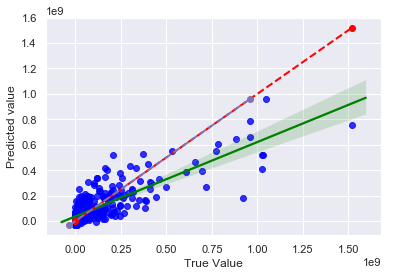

In [637]:
sb.regplot(y_test, y_pred_b,marker='o',scatter_kws={"color": "blue"}, line_kws={"color": "green"});
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'go--', lw=2,color='red');
plt.plot([y_pred_b.min(), y_pred_b.max()], [y_pred_b.min(), y_pred_b.max()], 'go--', lw=2,color='m');
plt.xlabel('True Value');
plt.ylabel('Predicted value');

In [638]:
print("Proposed Model Score: {0:.3f}".format(model_eval(y_test,y_pred_p)))

Proposed Model Score: 0.668


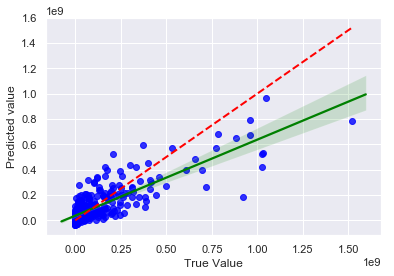

In [639]:
sb.regplot(y_test, y_pred_p,marker='o',scatter_kws={"color": "blue"}, line_kws={"color": "green"});
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,color='red');
plt.xlabel('True Value');
plt.ylabel('Predicted value');

## 5. Model Tuning

In [640]:
reg=SGDRegressor(eta0=0.001,loss="squared_loss", penalty="none",n_iter=100,power_t = 0.05) #eta0=0.000001,loss="squared_loss", 
                                                                                #penalty="none",n_iter=1000
reg.fit(X_train,y_train)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.001,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=100, penalty='none', power_t=0.05,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

In [641]:
y_pred_op=reg.predict(X_test)

## 6. Final Model Evaluation

In [644]:
print("__Optimized Proposed Model Score: {0:.3f}__".format(model_eval(y_test,y_pred_op)))

__Optimized Proposed Model Score: 0.665__


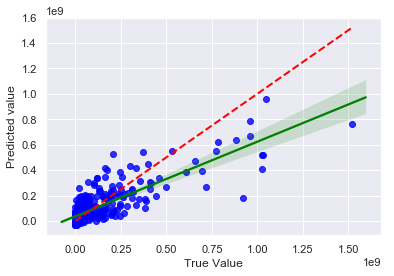

In [643]:
sb.regplot(y_test, y_pred_op,marker='o',scatter_kws={"color": "blue"}, line_kws={"color": "green"});
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,color='red');
plt.xlabel('True Value');
plt.ylabel('Predicted value');

### References:


[1] Scikit-learn Documentation, V.18, (https://scikit-learn.org/0.18/documentation.html) 